In [ ]:
import pandas as pd

In [ ]:
results_wk3=pd.read_csv("results_wk3.csv")

In [56]:
results_wk12=pd.read_csv("results_wk1_and_2.csv")

In [57]:
results_wk12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57376 entries, 0 to 57375
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  57376 non-null  int64  
 1   level_0                       57376 non-null  int64  
 2   Unnamed: 0                    57376 non-null  int64  
 3   index                         57376 non-null  int64  
 4   author_id                     57376 non-null  int64  
 5   text                          57376 non-null  object 
 6   edit_history_tweet_ids        57376 non-null  object 
 7   context_annotations           33129 non-null  object 
 8   id                            57376 non-null  int64  
 9   created_at                    57376 non-null  object 
 10  public_metrics_retweet_count  57376 non-null  int64  
 11  public_metrics_reply_count    57376 non-null  int64  
 12  public_metrics_like_count     57376 non-null  int64  
 13  h

Combine all weeks of data

In [59]:
results_wk123=pd.concat((results_wk3,results_wk12.iloc[:,3:18]), axis=0).reset_index()

In [64]:
results_wk123["text_no_punc_lower_no_dig"].isnull().sum()

1

In [65]:
results_wk123= results_wk123[results_wk123["text_no_punc_lower_no_dig"].notna()]

In [66]:
results_wk123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82479 entries, 0 to 82479
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   level_0                       82479 non-null  int64  
 1   index                         82479 non-null  int64  
 2   text                          82479 non-null  object 
 3   edit_history_tweet_ids        82479 non-null  object 
 4   created_at                    82479 non-null  object 
 5   id                            82479 non-null  object 
 6   author_id                     82479 non-null  object 
 7   context_annotations           48503 non-null  object 
 8   public_metrics_retweet_count  82479 non-null  int64  
 9   public_metrics_reply_count    82479 non-null  int64  
 10  public_metrics_like_count     82479 non-null  int64  
 11  public_metrics_quote_count    25104 non-null  float64
 12  hashtag                       68950 non-null  object 
 13  t

In [200]:
results_wk123[['public_metrics_retweet_count','public_metrics_reply_count','public_metrics_like_count']].describe()
#not a super retweetable or liked topic, I guess? Or maybe it's hard for things to go viral on twitter in this space. At any rate, it's highlyg skewed

,public_metrics_retweet_count,public_metrics_reply_count,public_metrics_like_count
count,82479.000000,82479.000000,82479.000000
mean,2.253834,1.076407,7.662435
std,54.529841,33.383572,146.402882
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000
max,8167.000000,5382.000000,20650.000000


In [227]:
results_wk123.public_metrics_like_count.info()


<class 'pandas.core.series.Series'>
Int64Index: 82479 entries, 0 to 82479
Series name: public_metrics_like_count
Non-Null Count  Dtype  
--------------  -----  
82479 non-null  float32
dtypes: float32(1)
memory usage: 3.0 MB


Exploratory Data Analysis

In [225]:
results_wk123['public_metrics_like_count']=pd.to_numeric(results_wk123['public_metrics_like_count'], downcast='float')

In [ ]:
from matplotlib.pyplot import ylim

import matplotlib.pyplot as plt

Text(0, 0.5, 'Counts')

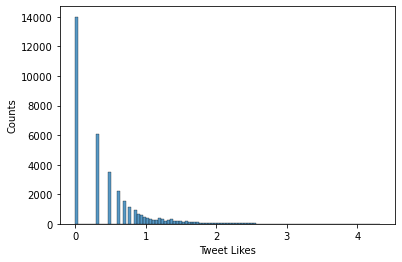

In [282]:
sb.histplot(np.log10(results_wk123['public_metrics_like_count']))
#plt.ylim(0, 100000)
plt.xlabel("Tweet Likes")
#plt.xscale('symlog')
#plt.xlim(0,1000)
#plt.yscale('symlog')
plt.ylabel("Counts")
#plt.savefig('like_counts.png', facecolor="white")

<Figure size 432x288 with 0 Axes>

In [211]:
likes_subset=results_wk123[results_wk123['public_metrics_like_count'] > results_wk123['public_metrics_like_count'].quantile(0.98)]

In [220]:
pd.set_option('max_colwidth', 1000)
likes_subset[['text','public_metrics_like_count', 'author_id', 'id']].sort_values(by='public_metrics_like_count', ascending=False).head(20)


,text,public_metrics_like_count,author_id,id
76046,"More and more people are waking up to the absurdity of ""getting rid of fossil fuels,"" and ""net zero"" carbon.\n\nThe idea of ""eating bugs"" is dehumanizing. \n\nWe work to bring home the bacon, not the bugs. \n\n""Woke capitalism"" &amp; ""climate finance"" are massive bubbles waiting to burst.",20650,287413569,1583849055028801536
43402,"Germany is using coal power again and abandoning climate scam energy while promising to end coal by 2030.\n\nJust like China is burning more coal than ever while promising to be carbon net zero by 2050.\n\nFace it, fossil fuels like coal actually keep the lights on and houses warm.",16892,1344356576786866176,1579904746747752449
14609,"For balance, my friend…The Prime Minister is WRONG not to go to COP. Global warming is the biggest crisis facing our planet and net zero creates many 1000s of jobs which is good for the economy. COP in Glasgow was most successful ever… but don’t expect media to report that https://t.co/YGkc66wts7",10928,457060718,1585937881876480001
81303,"💦BLUEMOVE MAINNET - TODAY💦\n\nFrom day zero and now we're here, joining the Aptos Autumn. For our dear collectors and NFT lovers, we've made it!\n\nGet your $APT ready. The very first launchpad has arrived!\n\nMinting in 90 mins!\n👉 https://t.co/oR4ZZ36BnP\n\n#MOVErs #Aptos #BlueMove https://t.co/zFlTKWJdnu",9396,1557643224348766209,1583104089785004033
5363,"Life under CBDC and social credit score… if you also add they will tracking individual carbon footprint, this will be a common occurrence in the near future… https://t.co/VJ5Y0YmA3u",8848,1366565625401909249,1585411106633576448
17341,RISHI ‘TRUDEAU’ - at COP 26.\n\n‘We want to rewire the entire global financial system for net zero'\n\nRead that again. Don’t say you weren’t warned! \n\n https://t.co/NreLw8gT4R,7453,755135678422327296,1585576453952905219
74950,"SWEDEN - The Swedish government has throw out the “mad greens” and thrown out Net Zero policies.\n\nWe should have listened to Sweden during Covid &amp; we should listen to them again.\n\nNet Zero is a con, they know it, we know it.\n\nhttps://t.co/JXLlPegMiS",7300,755135678422327296,1584091798003412993
13956,"It was great to meet with @BillGates this week.\n\nWe discussed how the UK can support global health development and use the net zero goal to invest in science and technology, creating new jobs.\n\nLabour will boost growth and protect the environment with our Green Prosperity Plan. https://t.co/ZBoIr8ef8o",6684,2425571623,1586000837305942017
72217,"If he wants to show he's different, Sunak should fire Rees-Mogg, abandon Rwanda policy, the new protest laws, reconsider the Single Market, establish working relationship with Sturgeon, actually implement Net Zero policies, ban the anti-woke culture war rhetoric. Let's see.",6311,12321952,1584551123582869505
75800,"We haven’t heard of threats of blackouts since the 1970s. I want people to consider that. Fossil fuels have kept us consistently warm and alive since then, a push for Net Zero to appease a group of extremists in a country that emits 1 per cent of global CO2 emissions. I’m angry.",6084,4691437897,1583888992688226304


In [235]:
likes_subset=results_wk123[results_wk123['public_metrics_retweet_count'] > results_wk123['public_metrics_retweet_count'].quantile(0.98)]
pd.set_option('max_colwidth', 1000)
likes_subset[['text','public_metrics_retweet_count', 'author_id', 'id']].sort_values(by='public_metrics_retweet_count', ascending=False).head(20)


,text,public_metrics_retweet_count,author_id,id
81303,"💦BLUEMOVE MAINNET - TODAY💦\n\nFrom day zero and now we're here, joining the Aptos Autumn. For our dear collectors and NFT lovers, we've made it!\n\nGet your $APT ready. The very first launchpad has arrived!\n\nMinting in 90 mins!\n👉 https://t.co/oR4ZZ36BnP\n\n#MOVErs #Aptos #BlueMove https://t.co/zFlTKWJdnu",8167,1557643224348766209,1583104089785004033
76046,"More and more people are waking up to the absurdity of ""getting rid of fossil fuels,"" and ""net zero"" carbon.\n\nThe idea of ""eating bugs"" is dehumanizing. \n\nWe work to bring home the bacon, not the bugs. \n\n""Woke capitalism"" &amp; ""climate finance"" are massive bubbles waiting to burst.",4730,287413569,1583849055028801536
50748,@C_Charge_Token is an #EV charging &amp; payment solution that is democratizing the carbon credit sector and rewards EV drivers.\n\n👉Our second round of limited private sale will be starting soon. Join our telegram community to learn more.\nhttps://t.co/BcMsG3qjfD\n\n #EV #CarbonCredits https://t.co/OprnJxjRps,4695,1511434920069144579,1580668851577974784
17341,RISHI ‘TRUDEAU’ - at COP 26.\n\n‘We want to rewire the entire global financial system for net zero'\n\nRead that again. Don’t say you weren’t warned! \n\n https://t.co/NreLw8gT4R,4487,755135678422327296,1585576453952905219
43402,"Germany is using coal power again and abandoning climate scam energy while promising to end coal by 2030.\n\nJust like China is burning more coal than ever while promising to be carbon net zero by 2050.\n\nFace it, fossil fuels like coal actually keep the lights on and houses warm.",4151,1344356576786866176,1579904746747752449
75493,"The greatest blunder in human history. There's not enough lithium/cobalt in the world to replace EV batteries every 10 yrs. Net zero is impossible, trillions wasted on useless renewable technology from 'rare earths' &amp; cheap oil/gas/coal energy destroyed. \nhttps://t.co/jRBRyWJ50E",3297,123504748,1583935606421585920
5363,"Life under CBDC and social credit score… if you also add they will tracking individual carbon footprint, this will be a common occurrence in the near future… https://t.co/VJ5Y0YmA3u",3172,1366565625401909249,1585411106633576448
74950,"SWEDEN - The Swedish government has throw out the “mad greens” and thrown out Net Zero policies.\n\nWe should have listened to Sweden during Covid &amp; we should listen to them again.\n\nNet Zero is a con, they know it, we know it.\n\nhttps://t.co/JXLlPegMiS",3011,755135678422327296,1584091798003412993
12198,"COP 27 - The farmers were right. COP27 will preach a 50% cut in meat is required to stop climate change.\n\nThis will impoverish millions globally, whilst making processed food corporations &amp; their investors billions.\n\nFor the fraud of Net Zero. Focus 🔥\n\n https://t.co/ATOJAIqEq5",2395,755135678422327296,1586339243844329475
41682,"And now you know they lied. All of them. Leaders, Governments, experts, media, NGO’s and presenters.\n\nWhy aren’t you questioning what they are telling you now? About war? Climate change? the economy? Net Zero?\n\nWe’re still trying to wake you up 🔥",1991,755135678422327296,1580194932312375298


CountVectorizer and LSA

In [61]:
from numpy import NaN
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer
stemmer = SnowballStemmer("english") # why isn't this stemmer changing "reducing" to "reduce"? 
def prep(word, stemmer=SnowballStemmer("english")):
    
    with open('./stop_words_en.txt', 'r') as f:
        stopwords = [s.strip() for s in f.readlines()]
        
    if word.lower() in stopwords:
        return None
    
    elif stemmer is None:
        return word.lower()
    
    else:
        return stemmer.stem(word)

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vec = CountVectorizer(stop_words='english',
                      min_df=100,  # This is default; this is just a reminder it exists
                      max_df=0.8,
                      preprocessor=prep)

In [67]:
testing=vec.fit_transform(results_wk123["text_no_punc_lower_no_dig"])

In [397]:
testing

<82479x1927 sparse matrix of type '<class 'numpy.int64'>'
	with 869103 stored elements in Compressed Sparse Row format>

In [68]:
vec.get_feature_names()

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ability',
 'able',
 'absolute',
 'absolutely',
 'acc',
 'accelerate',
 'accelerating',
 'accept',
 'access',
 'according',
 'account',
 'accounting',
 'accounts',
 'achieve',
 'achieved',
 'achieving',
 'act',
 'action',
 'actions',
 'activists',
 'activities',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'additional',
 'address',
 'addressing',
 'adopt',
 'advertising',
 'aeso',
 'affect',
 'afford',
 'affordable',
 'africa',
 'ag',
 'age',
 'agency',
 'agenda',
 'ago',
 'agree',
 'agreed',
 'agreement',
 'agricultural',
 'agriculture',
 'ahead',
 'ai',
 'aid',
 'aim',
 'aiming',
 'aims',
 'air',
 'airlines',
 'airport',
 'aka',
 'al',
 'alberta',
 'alliance',
 'allow',
 'allowance',
 'allowed',
 'allowing',
 'allows',
 'alternative',
 'alternatives',
 'amazing',
 'amazon',
 'ambition',
 'ambitions',
 'ambitious',
 'america',
 'american',
 'amounts',
 'amp',
 'analysis',
 'animal',
 'animals',
 'announce',
 'announced',
 'announces',
 'annual',
 'answer',
 'anti',
 '

In [69]:
testing.shape

(82479, 1927)

In [70]:
testing.toarray

<bound method _cs_matrix.toarray of <82479x1927 sparse matrix of type '<class 'numpy.int64'>'
	with 869103 stored elements in Compressed Sparse Row format>>

In [72]:
testing_table=pd.DataFrame(testing.toarray(), index=results_wk123['id'], columns=vec.get_feature_names())

In [73]:
testing_table.head(20)

,ability,able,absolute,absolutely,acc,accelerate,accelerating,accept,access,according,...,year,years,yep,yes,yesterday,young,youtube,yrs,zero,zoom
id,,,,,,,,,,,,,,,,,,,,,
1587260766889005056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587260170081431552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587258609406205953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587257288653299712,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587256544806113281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587256087195033600,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1587256084443660289,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1587255112854020103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587254528516161536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
vec.vocabulary_

{'says': 493,
 'plans': 412,
 'hope': 263,
 'things': 565,
 'expensive': 182,
 'consumers': 99,
 'amp': 16,
 'people': 406,
 'taking': 547,
 'individual': 285,
 'action': 6,
 'climate': 87,
 'change': 78,
 'experts': 183,
 'work': 633,
 'did': 133,
 'footprint': 205,
 'just': 302,
 'greetings': 238,
 'eco': 151,
 'friendlies': 213,
 'known': 308,
 'toxic': 578,
 'company': 96,
 'apple': 20,
 'million': 367,
 'metric': 364,
 'tons': 575,
 'dioxide': 138,
 'll': 332,
 'guess': 244,
 'footprints': 206,
 'important': 274,
 'follow': 202,
 'daily': 125,
 'environmental': 169,
 'facts': 186,
 'banks': 36,
 'tracking': 580,
 'customer': 121,
 'digital': 137,
 'currency': 119,
 'water': 621,
 'kids': 304,
 'let': 322,
 'going': 229,
 'pay': 404,
 'crypto': 117,
 'does': 140,
 'bitcoin': 53,
 'mining': 368,
 'mean': 357,
 'demand': 130,
 'management': 348,
 'average': 31,
 'private': 439,
 'little': 329,
 'reduce': 466,
 'hi': 257,
 'green': 236,
 'thumbs': 569,
 'polluting': 425,
 'know': 307,

In [74]:

from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity


In [287]:
lsa = TruncatedSVD(6)
doc_topic = lsa.fit_transform(testing)
lsa.explained_variance_ratio_

array([0.01801803, 0.07835602, 0.01647706, 0.01509848, 0.01121576,
       0.01095169])

In [ ]:
doc_topic_df = pd.DataFrame(doc_topic, index = results_wk123.text)
doc_topic_df['Primary Topic'] = doc_topic_df.idxmax(axis=1)

In [76]:
topic_word = pd.DataFrame(lsa.components_.round(3),
             columns = vec.get_feature_names())
topic_word

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability,able,absolute,absolutely,acc,accelerate,accelerating,accept,access,according,...,year,years,yep,yes,yesterday,young,youtube,yrs,zero,zoom
0,0.001,0.004,0.002,0.004,0.002,0.004,0.002,0.002,0.003,0.003,...,0.025,0.021,0.001,0.010,0.001,0.001,0.002,0.006,0.457,0.002
1,-0.000,-0.001,0.001,0.001,0.003,0.003,0.002,0.000,-0.001,-0.000,...,0.000,0.005,-0.000,0.002,0.000,0.000,0.002,-0.000,0.525,-0.002
2,0.001,0.003,-0.000,-0.001,0.003,0.002,0.001,0.001,0.002,0.002,...,-0.009,0.004,-0.000,-0.001,0.000,0.000,-0.000,0.012,-0.066,-0.005
3,0.000,-0.001,-0.000,0.001,0.006,-0.000,0.000,0.001,0.001,-0.002,...,-0.007,-0.004,0.000,0.000,-0.001,0.001,-0.001,-0.014,-0.060,0.003


In [80]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [288]:
display_topics(lsa, vec.get_feature_names(), 12)


Topic  0
carbon, zero, net, footprint, amp, climate, energy, emissions, neutral, credits, just, people

Topic  1
zero, net, uk, boris, energy, immigration, government, amp, party, achieve, policies, reach

Topic  2
amp, neutral, carbon, credits, offset, credit, market, join, impt, tax, emissions, program

Topic  3
amp, footprint, energy, reduce, join, program, check, investing, impactful, token, presale, hey

Topic  4
climate, change, action, emissions, people, crisis, global, just, world, need, uk, real

Topic  5
energy, green, renewable, solar, reduce, use, neutral, gas, emissions, climate, new, power


In [291]:
!pip install wordcloud

     |████████████████████████████████| 158 kB 6.7 MB/s eta 0:00:01


In [323]:
##https://www.kaggle.com/code/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn/notebook
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa.components_[index]
  vocab_comp = zip(vec.get_feature_names(), comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400, background_color='white').generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

/var/folders/s7/_b96xmkx3klbpc4y0sz29j0r0000gn/T/ipykernel_90435/288313864.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


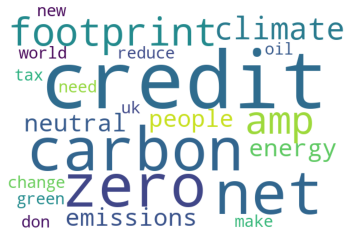

In [324]:
draw_word_cloud(0)
plt.savefig('cloud_0.png')

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/s7/_b96xmkx3klbpc4y0sz29j0r0000gn/T/ipykernel_90435/288313864.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


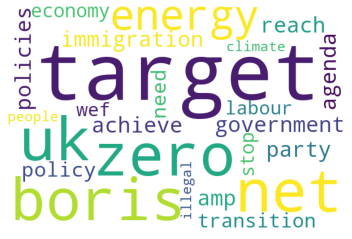

In [325]:
draw_word_cloud(1)
plt.savefig('cloud_1.png')

In [329]:
##https://www.kaggle.com/code/rajmehra03/topic-modelling-using-lda-and-lsa-in-sklearn/notebook
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lsa.components_[index]
  vocab_comp = zip(vec.get_feature_names(), comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[1:25]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400,background_color='white').generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

/var/folders/s7/_b96xmkx3klbpc4y0sz29j0r0000gn/T/ipykernel_90435/1943650965.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


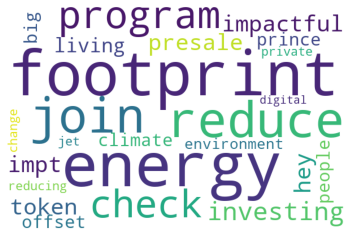

In [330]:
draw_word_cloud(3)
plt.savefig('cloud_3.png')


/var/folders/s7/_b96xmkx3klbpc4y0sz29j0r0000gn/T/ipykernel_90435/288313864.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


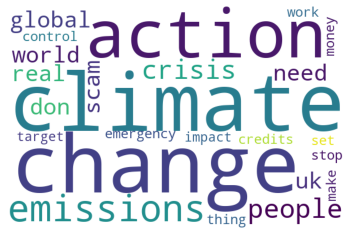

In [326]:
draw_word_cloud(4)

/var/folders/s7/_b96xmkx3klbpc4y0sz29j0r0000gn/T/ipykernel_90435/288313864.py:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


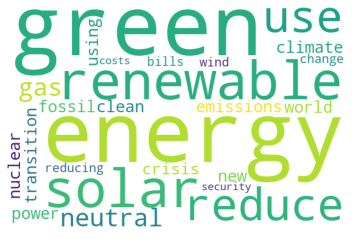

In [328]:
draw_word_cloud(5)
plt.savefig('cloud_5.png')

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [83]:

tfid_vec = TfidfVectorizer(stop_words='english',
                      use_idf=True, 
                      smooth_idf=True,
                      min_df=100,  # This is default; this is just a reminder it exists
                      max_df=0.8,
                      preprocessor=prep)

In [84]:
sum([len(d.split(' ')) for d in results_wk123.text_no_punc_lower_no_dig])

2796052

In [192]:
testingtfid=tfid_vec.fit_transform(results_wk123["text_no_punc_lower_no_dig"])

In [74]:
tfid_vec.get_feature_names()

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['able',
 'access',
 'according',
 'account',
 'achieve',
 'act',
 'action',
 'actually',
 'add',
 'agenda',
 'agree',
 'agriculture',
 'air',
 'allow',
 'amazon',
 'america',
 'amp',
 'analysis',
 'annual',
 'app',
 'apple',
 'approach',
 'aren',
 'art',
 'article',
 'ask',
 'atmosphere',
 'auditing',
 'australia',
 'australian',
 'available',
 'average',
 'aviation',
 'away',
 'bad',
 'bank',
 'banks',
 'based',
 'batteries',
 'battery',
 'begins',
 'believe',
 'benefit',
 'benefits',
 'best',
 'better',
 'biden',
 'big',
 'bigger',
 'biggest',
 'billion',
 'bills',
 'bit',
 'bitcoin',
 'blockchain',
 'bring',
 'build',
 'building',
 'burning',
 'business',
 'businesses',
 'buy',
 'buying',
 'called',
 'canada',
 'canadian',
 'canadians',
 'cap',
 'capture',
 'car',
 'card',
 'care',
 'cars',
 'case',
 'cash',
 'cause',
 'cbdc',
 'chain',
 'change',
 'changes',
 'check',
 'china',
 'city',
 'claim',
 'claims',
 'class',
 'clean',
 'climate',
 'closed',
 'coal',
 'come',
 'comes',
 'c

In [73]:
testingtfid.shape

(26553, 646)

In [75]:
testingtfid.toarray

<bound method _cs_matrix.toarray of <26553x646 sparse matrix of type '<class 'numpy.float64'>'
	with 188406 stored elements in Compressed Sparse Row format>>

In [86]:
testingtfid2=pd.DataFrame(testingtfid.toarray(), index=results_wk123['id'], columns=vec.get_feature_names())

In [87]:
testingtfid2.head(10)

,ability,able,absolute,absolutely,acc,accelerate,accelerating,accept,access,according,...,year,years,yep,yes,yesterday,young,youtube,yrs,zero,zoom
id,,,,,,,,,,,,,,,,,,,,,
1587260766889005056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1587260170081431552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1587258609406205953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1587257288653299712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1587256544806113281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1587256087195033600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103104,0.0
1587256084443660289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.215802,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1587255112854020103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1587254528516161536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [88]:
tfid_vec.vocabulary_

{'believe': 139,
 'social': 1583,
 'economic': 507,
 'environmental': 548,
 'sustainability': 1674,
 'using': 1820,
 'ready': 1393,
 'use': 1814,
 'equipment': 553,
 'renewable': 1436,
 'solar': 1587,
 'energy': 539,
 'committed': 314,
 'reducing': 1412,
 'carbon': 227,
 'footprint': 663,
 'respecting': 1450,
 'communities': 318,
 'connect': 335,
 'plastic': 1256,
 'compared': 322,
 'market': 1063,
 'time': 1721,
 'shipping': 1553,
 'reduced': 1410,
 'costs': 367,
 'idea': 846,
 'suggest': 1655,
 'll': 1016,
 'help': 802,
 'decrease': 432,
 'oh': 1183,
 'tell': 1698,
 'hey': 806,
 'green': 751,
 'thumbs': 1720,
 'number': 1165,
 'company': 321,
 'produces': 1327,
 'million': 1100,
 'tonnes': 1731,
 'food': 661,
 'packaging': 1209,
 'fun': 697,
 'fact': 599,
 'tune': 1777,
 'closed': 295,
 'door': 483,
 'stats': 1629,
 'don': 481,
 'large': 958,
 'esg': 555,
 'climate': 293,
 'change': 261,
 'virtual': 1833,
 'education': 512,
 'purpose': 1367,
 'public': 1361,
 'net': 1143,
 'zero': 19

In [93]:
lsa = TruncatedSVD(5)
doc_topic_tfid = lsa.fit_transform(testingtfid)
lsa.explained_variance_ratio_

array([0.00491298, 0.01823777, 0.00934837, 0.00704773, 0.00532975])

In [80]:
lsa.get_params()

{'algorithm': 'randomized',
 'n_components': 3,
 'n_iter': 5,
 'random_state': None,
 'tol': 0.0}

In [90]:
topic_word_tfid = pd.DataFrame(lsa.components_.round(3),
             columns = tfid_vec.get_feature_names())
topic_word_tfid

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,ability,able,absolute,absolutely,acc,accelerate,accelerating,accept,access,according,...,year,years,yep,yes,yesterday,young,youtube,yrs,zero,zoom
0,0.003,0.007,0.005,0.009,0.004,0.008,0.005,0.003,0.005,0.006,...,0.044,0.032,0.003,0.020,0.003,0.003,0.003,0.009,0.450,0.005
1,0.000,0.002,-0.002,-0.002,-0.004,-0.004,-0.004,-0.001,0.001,0.000,...,-0.010,-0.004,0.000,-0.001,-0.000,-0.000,-0.002,-0.001,-0.484,0.006
2,0.000,0.001,-0.000,-0.001,0.003,0.002,0.000,0.000,0.001,0.001,...,-0.004,0.000,-0.000,-0.002,0.000,0.000,0.001,0.002,-0.046,-0.003


In [94]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [95]:
display_topics(lsa, tfid_vec.get_feature_names(), 20)


Topic  0
zero, carbon, net, footprint, climate, amp, neutral, emissions, energy, reduce, credits, just, change, world, people, like, new, don, green, credit

Topic  1
carbon, footprint, neutral, reduce, credits, credit, offset, market, reducing, company, check, impt, hey, use, offsets, bigger, program, blockchain, token, impactful

Topic  2
amp, impt, offset, check, token, impactful, program, investing, presale, join, hey, credit, neutral, credits, ecosystem, competition, blockchain, based, market, emissions

Topic  3
neutral, credits, climate, carbon, credit, emissions, market, energy, tax, change, new, world, chain, offsets, plan, report, oil, make, achieve, gas

Topic  4
neutral, carbon, zero, net, qatar, cup, negative, later, offset, nfts, chain, impactful, token, hey, impt, join, presale, program, usdc, claims


DBSCAN after LSA dimension reduction (didn't finish)

In [193]:
lsa = TruncatedSVD(50) #chosen number of components based on thesis on tweets that compared HDBSCAN to kmeans #https://www.diva-portal.org/smash/get/diva2:1438923/FULLTEXT01.pdf page 
doc_topic = lsa.fit_transform(testingtfid)
lsa.explained_variance_ratio_

array([0.00491299, 0.01823777, 0.00934845, 0.00705243, 0.00533954,
       0.00528033, 0.0047893 , 0.00472367, 0.00469869, 0.00427285,
       0.00405734, 0.00392003, 0.00386825, 0.00369964, 0.0033414 ,
       0.00319625, 0.0031349 , 0.00303727, 0.00295422, 0.00288132,
       0.00281963, 0.0027208 , 0.00266857, 0.00266186, 0.00258097,
       0.00256415, 0.00255542, 0.00252799, 0.00246294, 0.00245668,
       0.00243882, 0.00242629, 0.00235383, 0.0023329 , 0.00228158,
       0.00226015, 0.00224816, 0.0022272 , 0.00217981, 0.00216596,
       0.00214065, 0.00210042, 0.00207823, 0.00205131, 0.00201939,
       0.00197211, 0.00194142, 0.00192757, 0.0019018 , 0.00187291])

In [195]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.18, min_samples=5)

In [196]:
dbscan.fit(doc_topic)

DBSCAN(eps=0.18)

In [197]:
y_pred=dbscan.labels_

In [198]:
y_pred[:10]

array([  0,   1,   1,   1,   1,   1, 243,   1,   1,   2])

In [199]:
colors=np.array(['teal', 'darkorange', 
  'crimson', 'black'])
plt.scatter(doc_topic[:, 0], doc_topic[:, 1], 
  color=colors[y_pred])

IndexError: index 243 is out of bounds for axis 0 with size 4